# Isolate watershed

In [1]:
from context import show_function
from main_data import create_watershed

In [2]:
%load_ext autoreload
%autoreload 2

## Script to isolate the watershed

steps involved:

- filter on reaches in Asia and flow larger than 1 m$^3$
- isolate watershed starting at latest reach

In this script the watershed starting from the padma river, is isolated from the HydroSheds dataset.

By running main_data.py in the case folder, the hydrosheds data is downloaded and processed.
The reaches are first filtered to select the reaches in Asia with a flow larger than 1 m$^3$.
This is done with the function ```filter_gloric()``` the result is saved as ```'data_gloric/padma_gloric_1m3_final.shp'```
The code to extract a watershed looks as follows:

In [3]:
show_function(create_watershed)

```python
def create_watershed():
    print('Creating watershed')
    destination_filename = 'data_gloric/padma_gloric_1m3_final.shp'
    if not os.path.isfile(destination_filename):
        start_id = 41067217
        gloric_orig = gp.read_file('data_gloric/gloric_asia_1m3.shp')
        gloric = gloric_orig.copy()
        gloric = gloric.set_index('Reach_ID',drop=False)
        
        print('\tCreating spatial index')
        start = time.time()
        spatial_index = gloric.sindex
        end = time.time()
        print('\t\tDuration: '+ '{:.2f}'.format(end - start) + 's')
        id_set = GloricHydrosheds.get_watershed(spatial_index,gloric,start_id)
        selection = gloric.loc[id_set]
        selection.to_file(destination_filename)

    if not os.path.isfile('data_gloric/padma_gloric_1m3_final_no_geo.pkl'):
        gp.read_file('data_gloric/padma_gloric_1m3_final.shp')\
            .drop(columns={'geometry'})\
            .to_pickle('data_gloric/padma_gloric_1m3_final_no_geo.pkl')

```

A spatial index is created to search fast.
The ```get_watershed()``` function from ```GloricHydrosheds.py``` extracts the watershed.
It starts with an ID, selects the inflowing reach and adds it to the selection.
For each found reach, the same procedure is repeated, until no more reaches can be found.
The result is a shapefile that contains the reaches of the Ganges-Brahmaputra watershed

## Plotting the result

In [4]:
import geopandas as gp
from matplotlib import pyplot as plt

In [5]:
filename = 'data_gloric/padma_gloric_1m3_final.shp'

In [6]:
rivernetwork = gp.read_file(filename)

The first option is to simply use Geopandas to plot the watershed.
This gives some insight in the shape and structure.

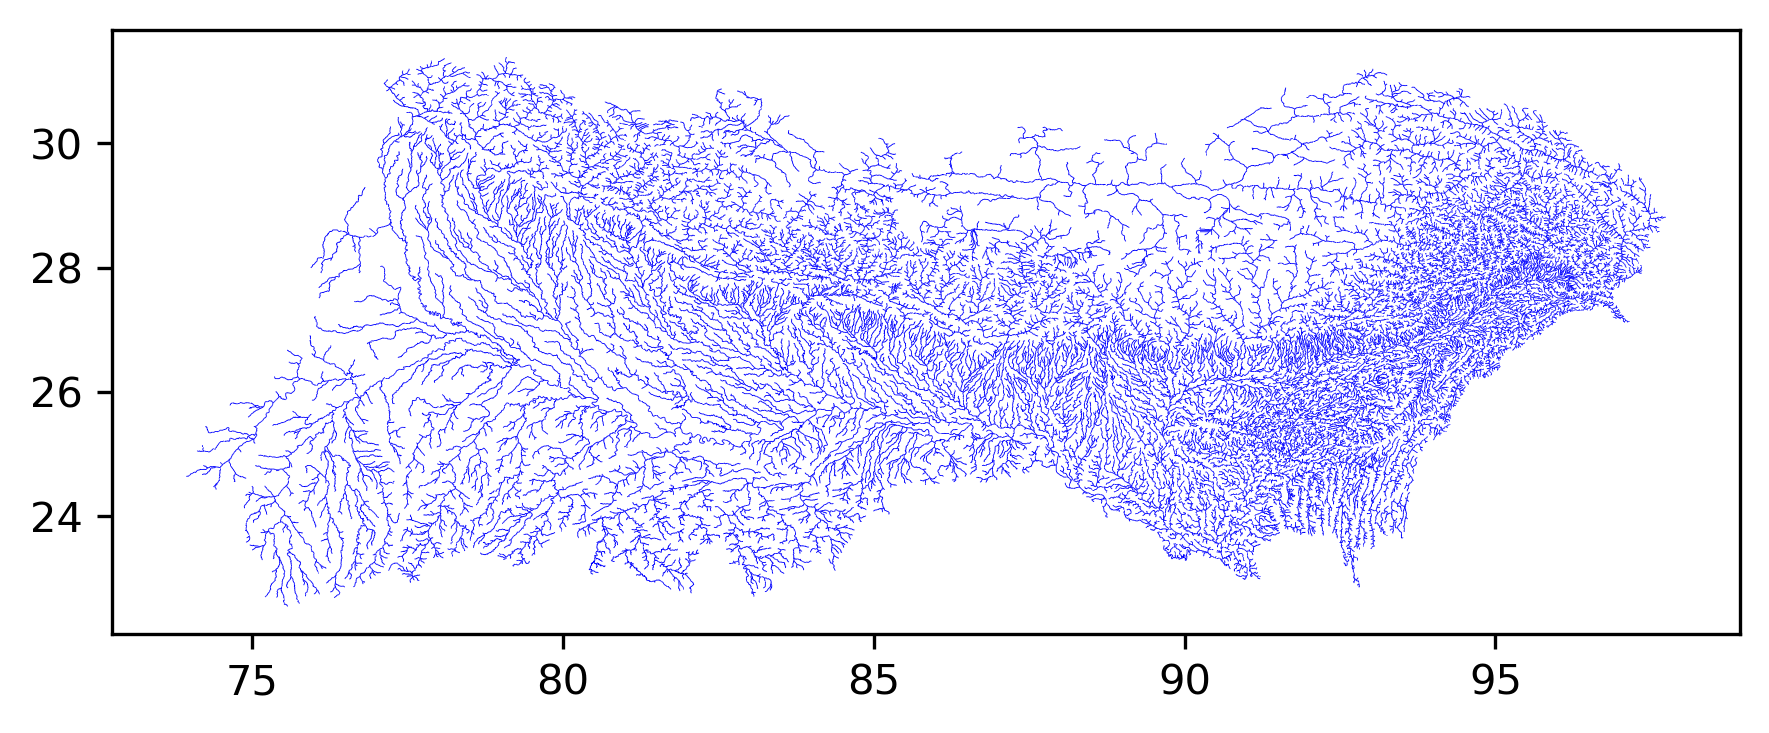

In [7]:
fig = plt.figure(figsize=(7,7),dpi=300)
ax = fig.add_subplot(111)
rivernetwork.plot(ax=ax,color='b',linewidth=0.2);

In [8]:
from custom_plot import *

The river network becomes clearer when the average flow is scaled with thickness.

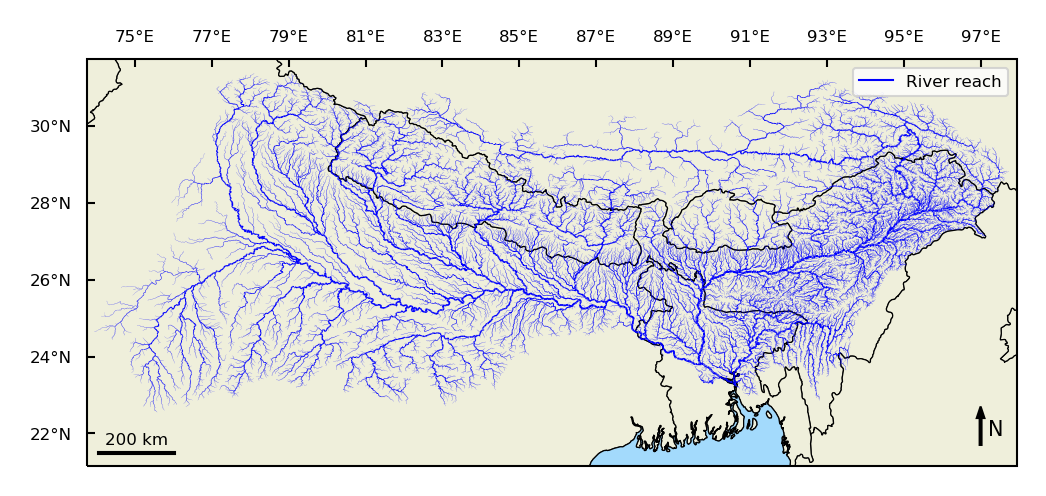

In [10]:
plot_river_map(rivernetwork);

.. Note:: Right click on any figure and select open image in new tab to see full resolution images.

## Comparing with actual map

The main river system becomes clear, when we highlight the reaches with an average flow larger than 200 m$^3$/s.
This figure shows many similarities with an actual river map of the area.
One notable difference is that the HydroSHEDS dataset does not contain bifurcations.
This can be seen for example in Bangladesh where the Hoogly river is missing that flows through Kolkata.

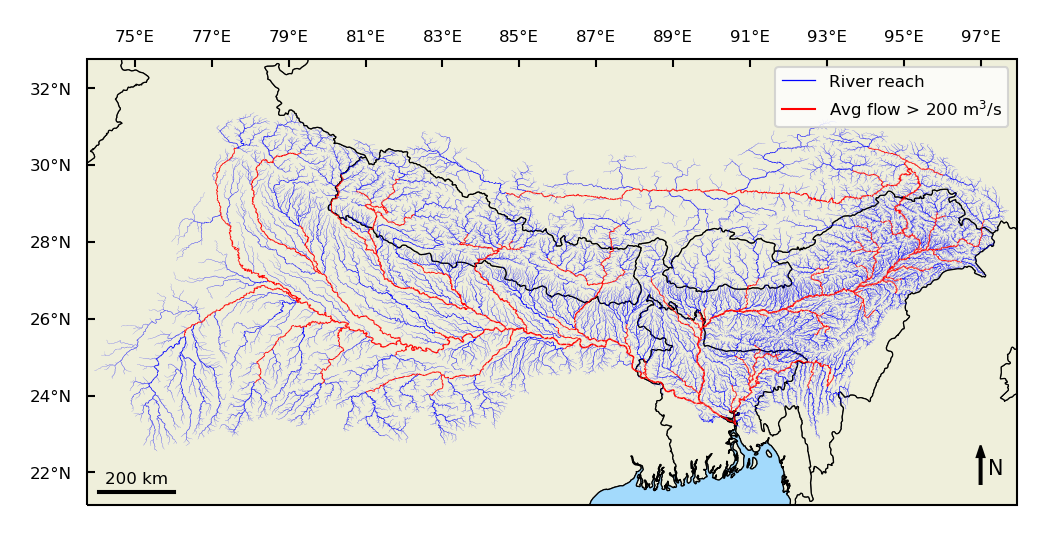

In [11]:
plot_river_map_2(rivernetwork,split = 200);

![Image of Ganges-Brahmaputra Basin](../_static/Ganges-Brahmaputra-Meghna_basins.jpg)